In [409]:
import math
import matplotlib.pyplot as plt
import random as rd
import numpy as np
import pandas as pd

In [410]:
def genRandom():
    
    output = []
    for i in range(100):
        x,y = rd.uniform(0,10), rd.uniform(1,10)
        output.append((x,y))
        
    return output

In [411]:
output = genRandom()

In [412]:
step = 0.2

In [413]:
# def func2(x,y):
#     return math.sin(2*x)+math.cos(y/2)

def func2(x,y):
    return abs(x - 2)+abs(0.5*y+1)-4

The following is the function that looks for maxi. neighbour and update neighbours

In [414]:
def maxi(current, step):
    x = current[0]
    y = current[1]
    neighbour = np.argmax([func2(x,min(y+step,10)),func2(x,max(y-step,0)),func2(min(x+step,10),min(y+step,10)),
                   func2(min(x+step,10),max(y-step,0)),func2(max(0,x-step),min(y+step,10)),func2(max(0,x-step),max(y-step,0)),func2(min(x+step,10),y),func2(max(0,x-step),y), func2(x,y)])
    result = np.amax([func2(x,min(y+step,10)),func2(x,max(y-step,0)),func2(min(x+step,10),min(y+step,10)),
                   func2(min(x+step,10),max(y-step,0)),func2(max(0,x-step),min(y+step,10)),func2(max(0,x-step),max(y-step,0)),func2(min(x+step,10),y),func2(max(0,x-step),y), func2(x,y)])
    if neighbour== 0:
        return (x,min(y+step,10)),result
    elif neighbour == 1:
        return (x,max(y-step,0)),result
    elif neighbour ==2:
        return (min(x+step,10),min(y+step,10)),result
    elif neighbour ==3:
        return (min(x+step,10),max(y-step,0)),result
    elif neighbour ==4:
        return (max(0,x-step),min(y+step,10)),result
    elif neighbour ==5:
        return (max(0,x-step),max(y-step,0)),result
    elif neighbour ==6:
        return (min(x+step,10),y),result
    elif neighbour ==7:
        return (max(0,x-step),y),result
    else:
        return (x,y),result

   

In [415]:
def forall(output):
    endpoint=[]
    resultList = []
    index = 0
    for current in output:
        for i in range(1000):
            index = 0
            result = func2(current[0],current[1])
            current,new_result = maxi(current, step)
            if abs(new_result-result) < 0.00001:
                index = i
                break
            else:
                index = i
                new_result = result
        endpoint.append(index)
        resultList.append(result)
    return endpoint, resultList

In [416]:
endpoint,result = forall(output)

In [417]:
print(endpoint,result)

[4, 36, 44, 13, 34, 16, 33, 44, 23, 22, 11, 43, 13, 28, 5, 35, 26, 33, 41, 9, 24, 10, 3, 28, 37, 35, 43, 40, 6, 16, 39, 36, 29, 40, 40, 37, 32, 24, 30, 35, 20, 44, 38, 42, 31, 32, 38, 26, 22, 28, 37, 20, 29, 38, 39, 45, 16, 36, 6, 37, 30, 35, 29, 13, 39, 37, 33, 32, 21, 21, 17, 31, 32, 34, 19, 7, 34, 44, 27, 26, 39, 36, 9, 29, 34, 38, 31, 22, 25, 26, 38, 7, 29, 37, 32, 33, 39, 34, 37, 40] [4.0, 10.0, 10.0, 4.0, 10.0, 10.0, 4.0, 10.0, 4.0, 10.0, 10.0, 10.0, 4.0, 10.0, 4.0, 10.0, 10.0, 10.0, 10.0, 4.0, 10.0, 4.0, 10.0, 10.0, 4.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 4.0, 10.0, 10.0, 10.0, 4.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 4.0, 4.0, 10.0, 10.0, 10.0, 10.0, 10.0, 4.0, 4.0, 10.0, 4.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 4.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 4.0, 10.0, 10.0, 10.0, 10.0, 4.0, 10.0, 10.0, 10.0, 4.0]


In [418]:
std = np.std(endpoint)
mean = np.mean(endpoint)
finalValue = np.mean(result)

In [419]:
print(std, mean, finalValue)

10.851225737215128 28.97 8.8


From the data I collected, function 1 with step size 0.01 has endpoint with std = 165.03865486606466 mean = 304.32, and it converges to 1.6788993808283763. 

step size = 0.05 has endpoint with std = 27.246054760276767 mean = 56.05, and it converges to 1.7359389093823143.


step size = 0.1 has endpoint with std =15.29301801476739  mean = 29.06 , and it converges to 1.6788993808283763.

step size = 0.2 has endpoint with std = 7.124015721487425 mean = 19.84 , and it converges to 1.7027377457720345.


## Visualization

In [407]:
# x = [0.01,0.05,0.1,0.2]
# y = [304.32,56.05,29.06,14.78]
# e = [165.03865486606466,27.246054760276767,15.29301801476739,7.124015721487425]
# plt.errorbar(x, y, e, linestyle='None', marker='^')

From the data I collected, function 2 with step size 0.01 has endpoint with std = 223.41355733258445 mean = 610.68 , and it converges to -2.9976678550226366 . 

step size = 0.05 has endpoint with std = 44.88970817459164 mean = 119.79, and it converges to -2.9877674470213584.


step size = 0.1 has endpoint with std =23.95704489289111  mean = 61.4 , and it converges to -2.97555916887661.

step size = 0.2 has endpoint with std = 10.38311610259656 mean = 31.97 , and it converges to -2.950128048919525.


## Visualization

<ErrorbarContainer object of 3 artists>

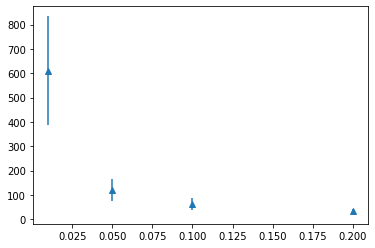

In [408]:
x = [0.01,0.05,0.1,0.2]
y = [610.68,119.79,61.4,31.97 ]
e = [223.41355733258445,44.88970817459164,23.95704489289111,10.38311610259656]
plt.errorbar(x, y, e, linestyle='None', marker='^')